In [166]:
import pandas as pd
import os
import numpy as np

### Upload Daily Covid Cases:

In [66]:
directory = "csse_covid_19_data_11_nov/csse_covid_19_daily_reports" 
#directory = "csse_covid_19_data_11_nov/try"
df_covid = pd.DataFrame() # initialization empty dataframe

for file in os.listdir(directory): # for each file
    
    if file.endswith(".csv"):
        directory_file = directory + "/" + file
        data_day = pd.read_csv(directory_file) 
        
        # handle the fact that some columns change name:
        if "Province/State" in data_day.columns:
            data_day = data_day.rename(columns={"Province/State":"Province_State"})
        
        if "Country/Region" in data_day.columns:
            data_day = data_day.rename(columns={"Country/Region":"Country_Region"})
                    
        if "Lat" in data_day.columns:
            data_day = data_day.rename(columns={"Lat":"Latitude"})
        
        if "Long_" in data_day.columns:
            data_day = data_day.rename(columns={"Long_":"Longitude"})
            
            
        if "Last Update" in data_day.columns:
            data_day = data_day.rename(columns={"Last Update":"Last_Update"})
            
        # add day_column
        data_day["Date"] = file[:-4] 

        # merge to the main Dataset 
        frames = [df_covid, data_day]

        df_covid = pd.concat(frames)
        
    else:
        continue

In [124]:
# split data and time in two columns:
df_covid.Last_Update = pd.to_datetime(df_covid.Last_Update)
df_covid.Date = pd.to_datetime(df_covid.Date)
df_covid['Time'] = df_covid.Last_Update.dt.strftime('%H:%M')

# fill nan values
df_covid.Confirmed = df_covid.Confirmed.fillna(0)
df_covid.Deaths = df_covid.Deaths.fillna(0)
df_covid.Recovered = df_covid.Recovered.fillna(0)

# adjust change of names
df_covid.Country_Region = df_covid.Country_Region.replace("Mainland China", "China")

In [125]:
df_covid.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,FIPS,Admin2,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio,Time
0,Anhui,China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00
1,Beijing,China,2020-01-22 17:00:00,14.0,0.0,0.0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00
2,Chongqing,China,2020-01-22 17:00:00,6.0,0.0,0.0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00
3,Fujian,China,2020-01-22 17:00:00,1.0,0.0,0.0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00
4,Gansu,China,2020-01-22 17:00:00,0.0,0.0,0.0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00


In [126]:
df_covid.size

15622074

In [127]:
# list countries:
countries = df_covid.Country_Region.unique()
print(f"In total we have {len(countries)} countries.")

In total we have 240 countries.


In [128]:
# adjudt different time formats and divide day and hour 

count_day_country = df_covid.groupby(["Date", "Country_Region"]).sum()

count_day_country.head()

Confirmed  Deaths  Recovered  Latitude  Longitude  \
Date       Country_Region                                                      
2020-01-22 China               547.0    17.0       28.0       0.0        0.0   
           Hong Kong             0.0     0.0        0.0       0.0        0.0   
           Japan                 2.0     0.0        0.0       0.0        0.0   
           Macau                 1.0     0.0        0.0       0.0        0.0   
           South Korea           1.0     0.0        0.0       0.0        0.0   

                           FIPS  Active  Incidence_Rate  Case-Fatality_Ratio  \
Date       Country_Region                                                      
2020-01-22 China            0.0     0.0             0.0                  0.0   
           Hong Kong        0.0     0.0             0.0                  0.0   
           Japan            0.0     0.0             0.0                  0.0   
           Macau            0.0     0.0             0.0                  0.0   
           South Korea      0.0     0.0             0.0                  0.0   

                           Incident_Rate  Case_Fatality_Ratio  
Date       Country_Region                                      
2020-01-22 China                     0.0                  0.0  
           Hong Kong                 0.0                  0.0  
           Japan                     0.0                  0.0  
           Macau                     0.0                  0.0  
           South Korea               0.0                  0.0

<AxesSubplot:xlabel='Date'>

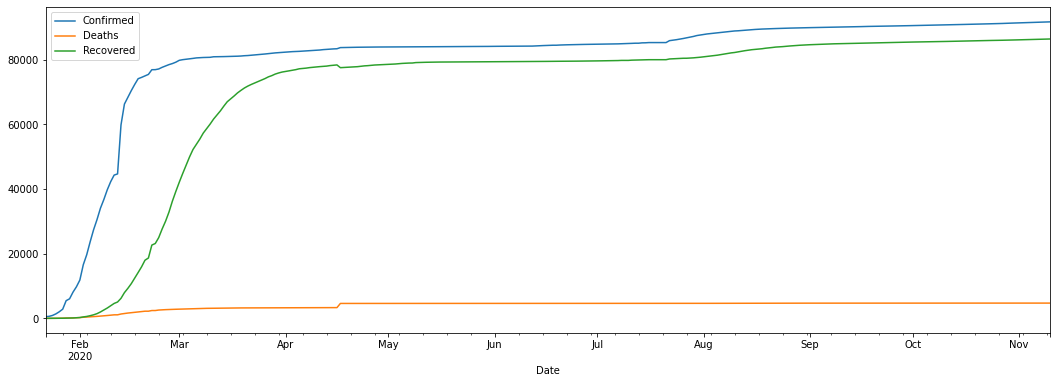

In [133]:
china = count_day_country.query('Country_Region == "China"')
china = china.reset_index(level=['Country_Region']).drop('Country_Region', axis=1)
china[['Confirmed', 'Deaths', 'Recovered']].plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

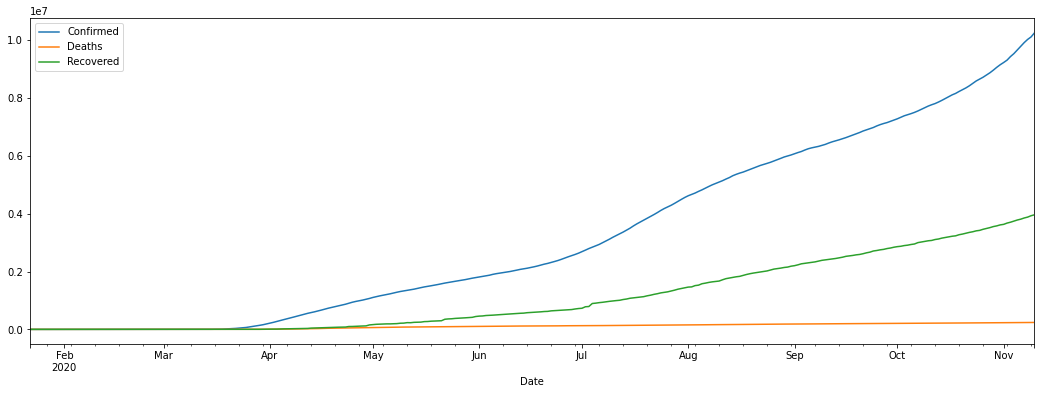

In [170]:
us = count_day_country.query('Country_Region == "US"')
us = us.reset_index(level=['Country_Region']).drop('Country_Region', axis=1)
us[['Confirmed', 'Deaths', 'Recovered']].plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

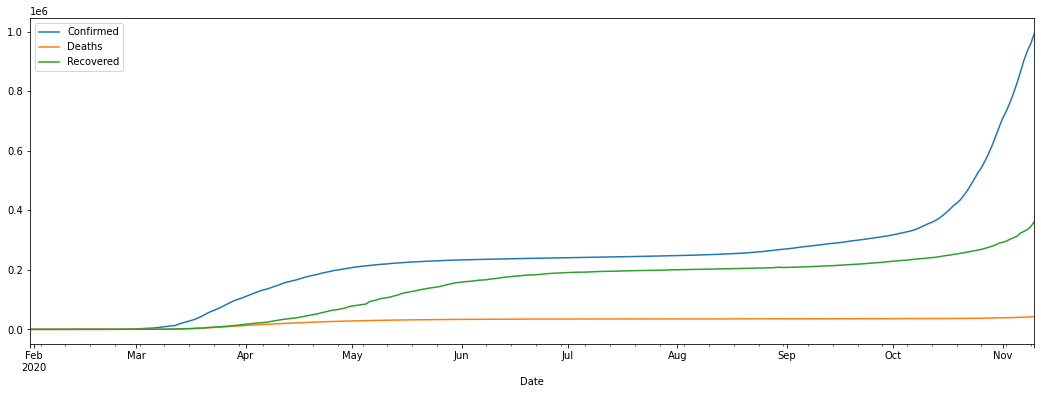

In [137]:
ita = count_day_country.query('Country_Region == "Italy"')
ita = ita.reset_index(level=['Country_Region']).drop('Country_Region', axis=1)
ita[['Confirmed', 'Deaths', 'Recovered']].plot(figsize=(18, 6))

#### New Cases

<AxesSubplot:xlabel='Date'>

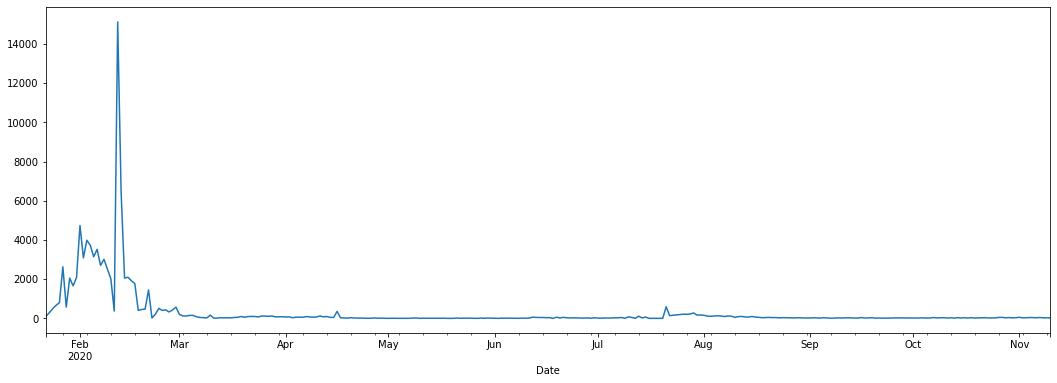

In [201]:
new_cases = china.Confirmed[1:].values - china.Confirmed[:-1].values
new_cases = np.append(new_cases, new_cases[-1])
china['New_Cases'] = new_cases
china['New_Cases'].plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

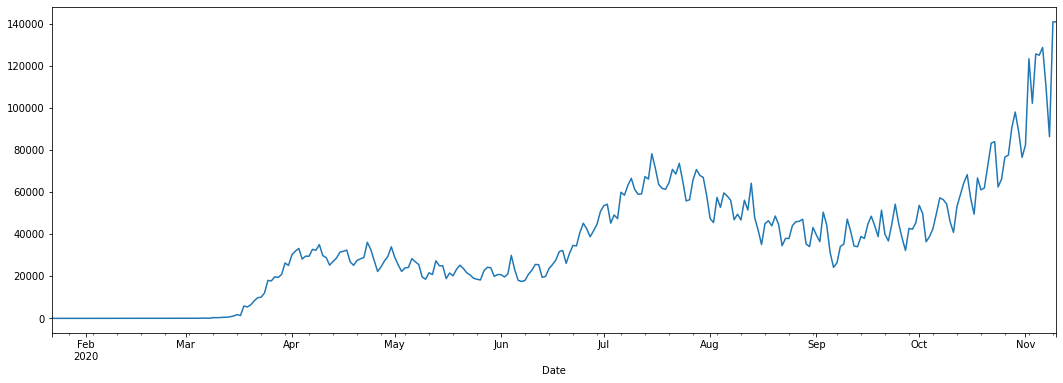

In [198]:
new_cases = us.Confirmed[1:].values - us.Confirmed[:-1].values
new_cases = np.append(new_cases, new_cases[-1])
us['New_Cases'] = new_cases
us['New_Cases'].plot(figsize=(18, 6))

<AxesSubplot:xlabel='Date'>

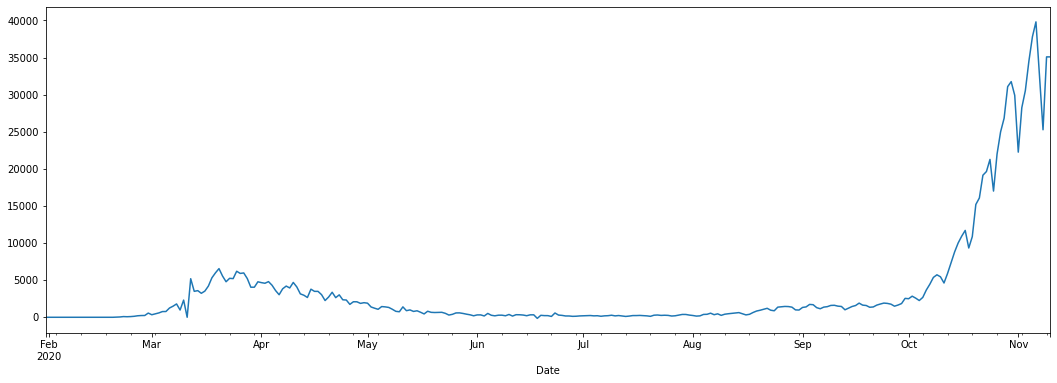

In [200]:
new_cases = ita.Confirmed[1:].values - ita.Confirmed[:-1].values
new_cases = np.append(new_cases, new_cases[-1])
ita['New_Cases'] = new_cases
ita['New_Cases'].plot(figsize=(18, 6))

In [193]:
new_cases = us.Confirmed[1:].values - us.Confirmed[:-1].values
new_cases = np.append(new_cases, new_cases[-1])

In [195]:
us['New_Cases'] = new_cases 

In [196]:
us.head()

,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Active,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio,New_Cases
Date,,,,,,,,,,,,
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2020-01-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
